In [25]:
import os
import torch
import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import vel
import vel.notebook as nb

In [27]:
nb.reasonable_notbook_defaults()
torch.set_grad_enabled(False)  # We don't need autograd here
None

In [28]:
config = nb.load_config('examples-configs/latent/mnist/mnist_cnn_vq_vae.yaml', run_number=13, device='cuda:0') 

In [29]:
model = config.load_trained_model().to(config.device)

In [30]:
model.summary()

VQVAE(
  (codebook): VQEmbedding(k=128, d=64)
  (encoder): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): SELU(inplace=True)
    (2): LayerNorm((64, 28, 28), eps=1e-05, elementwise_affine=True)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): SELU(inplace=True)
    (5): LayerNorm((128, 14, 14), eps=1e-05, elementwise_affine=True)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): SELU(inplace=True)
    (8): LayerNorm((256, 7, 7), eps=1e-05, elementwise_affine=True)
    (9): Conv2d(256, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): SELU(inplace=True)
    (11): LayerNorm((64, 7, 7), eps=1e-05, elementwise_affine=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): SELU(inplace=True)
    (2): LayerNorm((256, 7, 7), eps=1e-05, elementwise_affine=True)
    (3): ConvTranspose2d(256

In [31]:
data_loader = config.provide('loader')
data_source = data_loader.transformed_source
train_dataset = data_source.train
validation_dataset = data_source.validation

In [32]:
def get_sample(idx):
    return train_dataset[idx]['x'].to(config.device)

In [33]:
def show_image(axis, sample):
    axis.imshow(train_dataset.denormalize_item(sample, 'x'), cmap='gray')

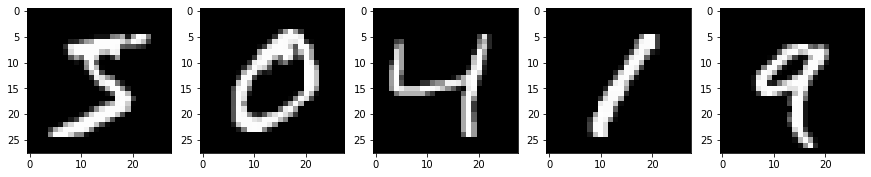

In [34]:
# Browse examples
fig, axes = plt.subplots(1, 5)

for index in range(5):
    show_image(axes[index], get_sample(index).cpu())

In [35]:
x = model.encode(get_sample(0)[None])
print(x)
print(x.shape)

tensor([[[ 23,  23,  23,  23,  23,  23,  23],
         [ 23,  64,  88, 106,   4, 121,  29],
         [ 23,  70, 114,  51,  31,  12,  12],
         [ 23,  23,  46, 117,  22,  23,  23],
         [ 23,  23,  23,  70, 114, 104,  23],
         [ 23,  22,   4,  65, 116,  29,  23],
         [ 99, 116,  51, 110,  23,  23,  23]]], device='cuda:0')
torch.Size([1, 7, 7])


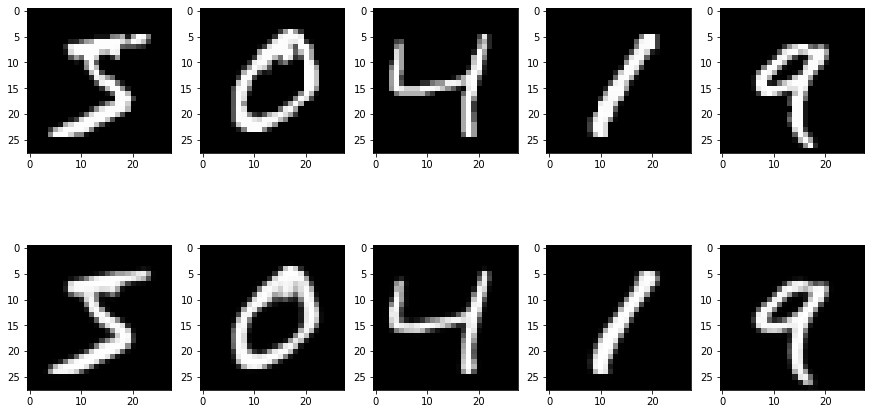

In [36]:
# Browse examples
fig, axes = plt.subplots(2, 5)

for index in range(5):
    sample = get_sample(index)
    decoded = model(sample[None])[0].detach()
    show_image(axes[0, index], sample.cpu())
    show_image(axes[1, index], decoded.cpu())